# Load data and clean

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# carInsurance: llamadas desde un call center para venderles un seguro de coche concreto. 
df_carinsurance = pd.read_csv('/Users/miguel/data/projectplanning/carInsurance_train.csv')
df_carinsurance

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [62]:
from datetime import datetime


call_start = datetime.strptime(df_carinsurance['CallStart'], '%H:%M:%S')
call_end = datetime.strptime(df_carinsurance['CallEnd'], '%H:%M:%S')

df_carinsurance['Duration'] = call_start - call_end


TypeError: strptime() argument 1 must be str, not Series

In [64]:
df_carinsurance['CallDuration'] = ((pd.to_datetime(df_carinsurance['CallEnd']) - pd.to_datetime(df_carinsurance['CallStart'])).astype('<m8[m]').astype(int))

In [65]:
df_carinsurance['CallDuration']

0        1
1        3
2        5
3       13
4        3
        ..
3995     4
3996     2
3997     4
3998     1
3999     4
Name: CallDuration, Length: 4000, dtype: int64

In [51]:
df_carinsurance.shape

(4000, 19)

In [9]:
target = df_carinsurance[['CarInsurance']]

In [27]:
data = df_carinsurance[['DaysPassed', 'PrevAttempts']]

# Visualization

In [19]:
import seaborn as sns

In [21]:
df_corr = df_carinsurance.corr()
df_corr

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Id,1.000000,0.000999,0.003334,-0.006639,0.004419,-0.003026,-0.017358,0.008898,0.014355,0.012662,-0.017864
Age,0.000999,1.000000,0.003720,0.094330,-0.183861,-0.012383,0.013762,0.028561,-0.016685,-0.002503,0.039158
Default,0.003334,0.003720,1.000000,-0.054045,-0.014974,0.124936,0.027350,0.029884,-0.033388,-0.031812,-0.039506
Balance,-0.006639,0.094330,-0.054045,1.000000,-0.072401,-0.081684,0.015519,-0.005201,-0.002107,0.001323,0.041561
HHInsurance,0.004419,-0.183861,-0.014974,-0.072401,1.000000,0.088145,-0.024075,-0.005858,0.081246,0.026900,-0.203419
CarLoan,-0.003026,-0.012383,0.124936,-0.081684,0.088145,1.000000,0.011299,0.020652,-0.041678,-0.020796,-0.092131
LastContactDay,-0.017358,0.013762,0.027350,0.015519,-0.024075,0.011299,1.000000,0.144303,-0.073521,-0.072977,-0.061271
NoOfContacts,0.008898,0.028561,0.029884,-0.005201,-0.005858,0.020652,0.144303,1.000000,-0.100634,-0.056527,-0.114884
DaysPassed,0.014355,-0.016685,-0.033388,-0.002107,0.081246,-0.041678,-0.073521,-0.100634,1.000000,0.496507,0.138943
PrevAttempts,0.012662,-0.002503,-0.031812,0.001323,0.026900,-0.020796,-0.072977,-0.056527,0.496507,1.000000,0.148763


<AxesSubplot:>

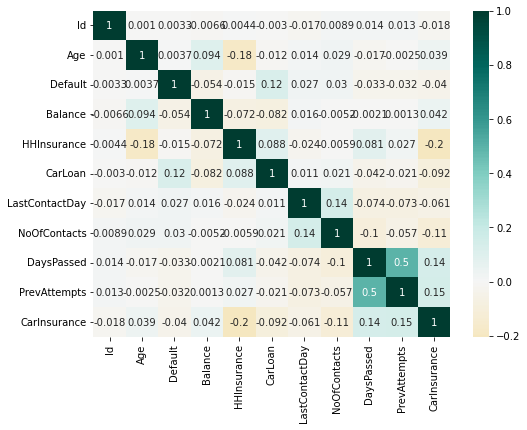

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='BrBG', center=0)

In [1]:
plt.hist(housing_y, bins=50);

NameError: name 'plt' is not defined

# Model

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [29]:
lr.fit(data, target)

LinearRegression()

In [30]:
lr.predict(data)

array([[0.36336072],
       [0.36336072],
       [0.43594855],
       ...,
       [0.36336072],
       [0.528741  ],
       [0.36336072]])

# Evaluation

In [31]:
# MSE

y_hat = lr.predict(data)
mse = np.mean((target - y_hat) ** 2)

# RMSE 
rmse = np.sqrt(mse)



mse, rmse

(CarInsurance    0.233533
 dtype: float64,
 CarInsurance    0.483253
 dtype: float64)

In [32]:
results = pd.DataFrame(columns = ['MSE', 'RMSE'])
results.loc['linear_regression'] = [mse, rmse]
results

,MSE,RMSE
linear_regression,CarInsurance 0.233533 dtype: float64,CarInsurance 0.483253 dtype: float64


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logR = LogisticRegression()
logR.fit(data, target)
evaluate(logR, data, target)

In [58]:
logR.fit(data, target)

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

def evaluate(estimator, data, target):

    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)
    probs = estimator.predict_proba(X_test)[:,1]

    # plotear curva roc
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    f, ax = plt.subplots(1,1)
    f.set_size_inches(8,7)
    ax.plot(fpr,tpr)
    ax.plot([0,1], [0,1], c='grey')

    print(f'acc: {accuracy_score(y_test, y_hat):.3} \
    recall: {recall_score(y_test, y_hat):.3} \
    precision:{precision_score(y_test, y_hat):.3} \
    f1:{f1_score(y_test, y_hat):.3} \
    auc:{roc_auc_score(y_test, probs):.3}')

acc: 0.6     recall: 0.176     precision:0.514     f1:0.262     auc:0.586


/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


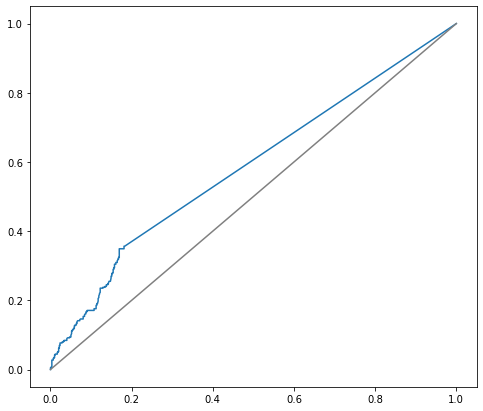

In [56]:
evaluate(logR, data, target)

In [57]:
data = df_carinsurance[['DaysPassed', 'PrevAttempts', 'Balance']]

acc: 0.593     recall: 0.173     precision:0.578     f1:0.267     auc:0.612


/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


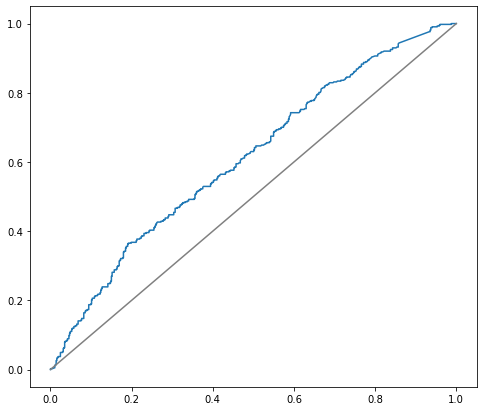

In [60]:
logR = LogisticRegression()
logR.fit(data, target)
evaluate(logR, data, target)

In [ ]:
data = df_carinsurance[['Age', 'PrevAttempts', 'Balance']]

In [ ]:
logR = LogisticRegression()
logR.fit(data, target)
evaluate(logR, data, target)